#Importing Libraires

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix
from tensorflow.keras.layers import Input,Dense,BatchNormalization,Dropout,concatenate,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.layers import Add,Activation,Conv1D,MaxPooling1D,ZeroPadding1D,AveragePooling1D,DepthwiseConv1D
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Nadam,Adagrad  
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Loading Dataset

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Virtual Consultant (FYP)/Heart Disease/Preprocessed_data.csv")

In [3]:
data.head()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,target,chest pain type_asymptomatic,chest pain type_atypical angina,chest pain type_non-anginal pain,chest pain type_typical angina,ST slope_downsloping,ST slope_flat,ST slope_normal,ST slope_upsloping,resting ecg_ST-T wave abnormality,resting ecg_left ventricular hypertrophy,resting ecg_normal
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,0,0,1
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,0,1,1,0,0
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,0,0,1
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,0,0,1,0,0,1


#Spliting the dependent and independent variables

In [4]:
In = data.drop("target",axis = 1)
Output = data["target"]

#Spliting the data into train and test

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(In,Output,test_size = 0.2, random_state = 55)

#Normalizing the Data

In [6]:
minmax = MinMaxScaler()
col = ["age","resting bp s","cholesterol","max heart rate","oldpeak"]
X_train[col] = minmax.fit_transform(X_train[col])
X_test[col] = minmax.transform(X_test[col])

#Neural Networks

##Model 1 with 96.30% test accuracy

In [ ]:
input_layer = Input(shape = (19,))

dense1 = Dense(256,activation = "relu")(input_layer)
bn1 = BatchNormalization()(dense1)


dense2 = Dense(128,activation = "relu")(bn1)
bn2 = BatchNormalization()(dense2)

dense3 = Dense(64,activation="relu")(bn2)
bn3 = BatchNormalization()(dense3)

dense4 = Dense(32,activation = "relu")(bn3)
bn4 = BatchNormalization()(dense4)

dense5 = Dense(16,activation="relu")(bn4)
bn5 = BatchNormalization()(dense5)
output_layer = Dense(1,activation = "sigmoid")(bn5)

model1 = Model(inputs = input_layer,outputs = output_layer)
# with 30 epochs accuracy 99 and 88
#with 2000 epochs accuracy 1 and 89
model1.compile(optimizer="rmsprop",loss = "binary_crossentropy",metrics = ["accuracy"])
model1.fit(X_train,Y_train,batch_size=64,epochs = 1000)
model1.evaluate(X_test,Y_test)

Epoch 1/1000
12/12 [==============================] - 3s 6ms/step - loss: 0.4683 - accuracy: 0.7894
Epoch 2/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.3162 - accuracy: 0.8795
Epoch 3/1000
12/12 [==============================] - 0s 6ms/step - loss: 0.2907 - accuracy: 0.8795
Epoch 4/1000
12/12 [==============================] - 0s 6ms/step - loss: 0.2522 - accuracy: 0.9113
Epoch 5/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.2392 - accuracy: 0.9113
Epoch 6/1000
12/12 [==============================] - 0s 6ms/step - loss: 0.2215 - accuracy: 0.9179
Epoch 7/1000
12/12 [==============================] - 0s 6ms/step - loss: 0.2080 - accuracy: 0.9205
Epoch 8/1000
12/12 [==============================] - 0s 6ms/step - loss: 0.1916 - accuracy: 0.9232
Epoch 9/1000
12/12 [==============================] - 0s 6ms/step - loss: 0.1879 - accuracy: 0.9325
Epoch 10/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.1742 - accuracy: 0.9391

[0.4941849410533905, 0.9629629850387573]

[]

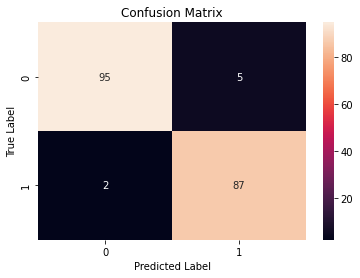

In [12]:
y_pred_model1 = model1.predict(X_test)
y_pred_model1 = np.round(y_pred_model1)
y_pred_model1 = np.ravel(y_pred_model1)

cm = confusion_matrix(Y_test,y_pred_model1)

sns.heatmap(cm,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()

##Model 2 with 95.24% test accuracy

In [ ]:
input_layer = Input(shape = (19,))

dense1 = Dense(256,activation = "relu")(input_layer)
bn1 = BatchNormalization()(dense1)
dense2 = Dense(128,activation = "relu")(bn1)
bn2 = BatchNormalization()(dense2)
dense3 = Dense(64,activation = "relu")(bn2)
bn3 = BatchNormalization()(dense3)

dense4 = Dense(128,activation = "relu")(input_layer)
bn4 = BatchNormalization()(dense4)
dense5 = Dense(32,activation = "relu")(bn4)
bn5 = BatchNormalization()(dense5)

dense6 = Dense(64,activation = "relu")(input_layer)
bn6 = BatchNormalization()(dense6)

concat = concatenate([bn3,bn5,bn6])
dense7 = Dense(32,activation = "relu")(concat)
bn7 = BatchNormalization()(dense7)

output_layer = Dense(1,activation = "sigmoid")(bn7)

model2 = Model(inputs = input_layer, outputs = output_layer)

model2.compile(optimizer="Adam",loss = "binary_crossentropy",metrics = ["accuracy"])
model2.fit(X_train,Y_train,batch_size=64,epochs = 1000)
model2.evaluate(X_test,Y_test)
# Adam 93

Epoch 1/1000
12/12 [==============================] - 4s 12ms/step - loss: 0.4859 - accuracy: 0.7921
Epoch 2/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.2961 - accuracy: 0.8901
Epoch 3/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.2569 - accuracy: 0.9033
Epoch 4/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.2354 - accuracy: 0.9166
Epoch 5/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.1958 - accuracy: 0.9232
Epoch 6/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.1950 - accuracy: 0.9272
Epoch 7/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.1846 - accuracy: 0.9311
Epoch 8/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.1611 - accuracy: 0.9404
Epoch 9/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.1487 - accuracy: 0.9470
Epoch 10/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.1399 - accuracy:

[0.5234768986701965, 0.9523809552192688]

[]

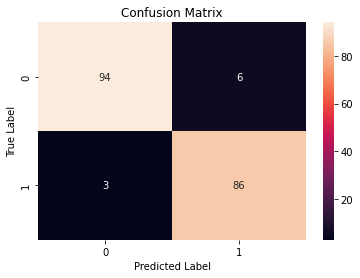

In [13]:
y_pred_model2 = model2.predict(X_test)
y_pred_model2 = np.round(y_pred_model2)
y_pred_model2 = np.ravel(y_pred_model2)

cm = confusion_matrix(Y_test,y_pred_model2)

sns.heatmap(cm,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()

##Model 3 with 96.30% test accuracy

In [ ]:
input_layer = Input(shape = (19,))
dense1 = Dense(256,activation = "relu")(input_layer)
dense2 = Dense(128,activation = "relu")(dense1)
dense3 = Dense(128,activation = "relu")(dense1)
concat = concatenate([dense2,dense3])
dense4 = Dense(64,activation = "relu")(concat)
output_layer = Dense(1,activation = "sigmoid")(dense4)

model3 = Model(inputs = input_layer , outputs = output_layer)

model3.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model3.fit(X_train,Y_train,batch_size = 128,epochs = 500)
model3.evaluate(X_test,Y_test)

Epoch 1/500
6/6 [==============================] - 1s 13ms/step - loss: 0.6171 - accuracy: 0.7404
Epoch 2/500
6/6 [==============================] - 0s 12ms/step - loss: 0.4616 - accuracy: 0.8411
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 0.3672 - accuracy: 0.8570
Epoch 4/500
6/6 [==============================] - 0s 8ms/step - loss: 0.3521 - accuracy: 0.8649
Epoch 5/500
6/6 [==============================] - 0s 7ms/step - loss: 0.3432 - accuracy: 0.8636
Epoch 6/500
6/6 [==============================] - 0s 8ms/step - loss: 0.3305 - accuracy: 0.8768
Epoch 7/500
6/6 [==============================] - 0s 10ms/step - loss: 0.3212 - accuracy: 0.8702
Epoch 8/500
6/6 [==============================] - 0s 12ms/step - loss: 0.3152 - accuracy: 0.8821
Epoch 9/500
6/6 [==============================] - 0s 10ms/step - loss: 0.3027 - accuracy: 0.8861
Epoch 10/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2956 - accuracy: 0.8848
Epoch 11/500
6/6 [=====

[0.5028554797172546, 0.9629629850387573]

[]

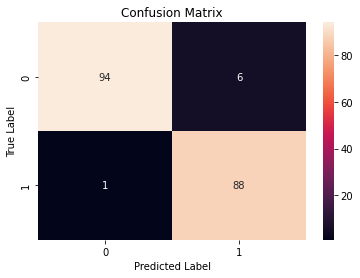

In [14]:
y_pred_model3 = model3.predict(X_test)
y_pred_model3 = np.round(y_pred_model3)
y_pred_model3 = np.ravel(y_pred_model3)

cm = confusion_matrix(Y_test,y_pred_model3)

sns.heatmap(cm,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()

#Results

In [16]:
accuracy_of_models = pd.DataFrame({
    "Train Accuracy":[
             model1.evaluate(X_train,Y_train,verbose = 0 )[1],
             model2.evaluate(X_train,Y_train,verbose = 0 )[1],
             model3.evaluate(X_train,Y_train,verbose = 0 )[1]],
    "Test Accuracy":[
            model1.evaluate(X_test,Y_test,verbose = 0 )[1],
            model2.evaluate(X_test,Y_test,verbose = 0 )[1],
            model3.evaluate(X_test,Y_test,verbose = 0 )[1]],
    "Precision":[precision_score(Y_test,y_pred_model1),
                 precision_score(Y_test,y_pred_model2),
                 precision_score(Y_test,y_pred_model3)],

    "Recall" :  [recall_score(Y_test,y_pred_model1),
                 recall_score(Y_test,y_pred_model2),
                 recall_score(Y_test,y_pred_model3)],

    "F1 Score" :  [f1_score(Y_test,y_pred_model1),
                   f1_score(Y_test,y_pred_model3),
                   f1_score(Y_test,y_pred_model3)]
            },
            index = ["Artifical Neural Network 1",
                     "Artifical Neural Network 2",
                     "Artifical Neural Network 3"
                     ])
accuracy_of_models["Train Accuracy"] = (accuracy_of_models["Train Accuracy"]*100).round(decimals =2 )
accuracy_of_models["Test Accuracy"] = (accuracy_of_models["Test Accuracy"]*100).round(decimals = 2)
accuracy_of_models["Precision"] = (accuracy_of_models["Precision"]* 100).round(decimals = 2)
accuracy_of_models["Recall"] = (accuracy_of_models["Recall"]* 100).round(decimals = 2)
accuracy_of_models["F1 Score"] = (accuracy_of_models["F1 Score"]* 100).round(decimals = 2)
accuracy_of_models

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
Artifical Neural Network 1,100.0,96.30,94.57,97.75,96.13
Artifical Neural Network 2,100.0,95.24,93.48,96.63,96.17
Artifical Neural Network 3,100.0,96.30,93.62,98.88,96.17
